In [1]:
import pandas as pd 

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv")

In [6]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df1=pd.get_dummies(df.Category)
df1

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [18]:
df2=pd.concat([df1.drop('spam',axis="columns"),df.drop('Category',axis="columns")],axis="columns")

In [24]:
df2

,ham,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df2.Message,df2.ham,test_size=0.2,random_state=5)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [23]:
pipe=Pipeline(steps=[('Vector',CountVectorizer()),('Multi',MultinomialNB())])

In [26]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Vector', CountVectorizer()), ('Multi', MultinomialNB())])

In [29]:
y_predict=pipe.predict(X_test)

In [28]:
pipe.predict_proba(X_test)

array([[1.00000000e+00, 9.44004290e-14],
       [3.34863903e-08, 9.99999967e-01],
       [2.33509772e-14, 1.00000000e+00],
       ...,
       [2.27187449e-05, 9.99977281e-01],
       [7.24813988e-05, 9.99927519e-01],
       [1.00000000e+00, 3.64219889e-22]])

In [34]:
pipe.score(X_test,y_test)

0.9863603732950467

In [38]:
pipe.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [30]:
from sklearn.metrics import confusion_matrix


In [31]:
con=confusion_matrix(y_predict,y_test)

<AxesSubplot:>

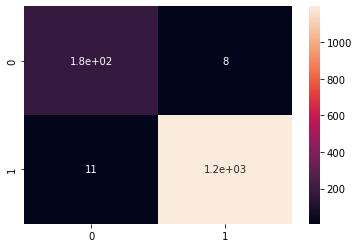

In [33]:
import seaborn as sn
sn.heatmap(con,annot=True)

# Error check


In [39]:
vector=CountVectorizer()

In [41]:
v_y_train=vector.fit_transform(X_train)

In [43]:
vector.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [44]:
v_y_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
model= MultinomialNB()

In [47]:
model.fit(v_y_train,y_train)

MultinomialNB()

In [48]:
email=vector.transform(X_test)

In [49]:
model.predict(email)

array([0, 1, 1, ..., 1, 1, 0], dtype=uint8)